In [1]:
import pandas as pd
import numpy as np
import string
import re
import nltk
ps = nltk.PorterStemmer()

In [2]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [3]:
from keras.utils import to_categorical

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences

In [5]:
def gen_data(len):
    lyrics_data = pd.read_csv("../data/380000-lyrics-from-metrolyrics/lyrics.csv")

    lyrics_data.head(4)

    lyrics_data = lyrics_data[pd.notnull(lyrics_data['lyrics'])]

    lyrics_data_sample = lyrics_data[0:len]

    lyrics_data_sample.head(4)

    def clean_text(text):
        text = text.replace('--', ' ')
        tokens = text.split()
        table = str.maketrans('', '', string.punctuation)
        tokens = [w.translate(table) for w in tokens]
        tokens = [word for word in tokens if word.isalpha()]
        tokens = [word.lower() for word in tokens]
        return tokens

    lyrics_data_sample['lyrics'] = lyrics_data_sample['lyrics'].apply(lambda x: clean_text(x))
    return lyrics_data_sample

In [6]:
data = gen_data(100)

f:\projects\env\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
data.head(4)

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"[oh, baby, how, you, doing, you, know, im, gon..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"[playin, everything, so, easy, its, like, you,..."
2,2,honesty,2009,beyonce-knowles,Pop,"[if, you, search, for, tenderness, it, isnt, h..."
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"[oh, oh, oh, i, oh, oh, oh, i, verse, if, i, w..."


In [8]:
tokens = list()
for row in data['lyrics']:
    tokens += row

length = 51
lines = list()
for i in range(0,len(tokens)-len(tokens)%length,length):
    seq = tokens[i:i+length]
    line = ' '.join(seq)
    lines.append(line)
print('Total Sequences: %d' % len(lines))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

sequences = np.array(sequences)

vocab_size = len(tokenizer.word_index) + 1

X, y = sequences[:,:-1], sequences[:,-1]
seq_length = X.shape[1]

X.shape

y = to_categorical(y, num_classes=vocab_size)

In [16]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            149950    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2999)              302899    
Total params: 603,749
Trainable params: 603,749
Non-trainable params: 0
_________________________________________________________________
None


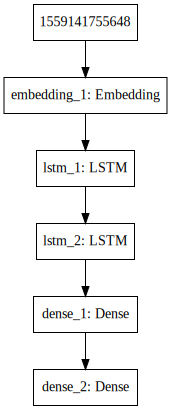

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [18]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
718/718 [==============================] - 10s 14ms/step - loss: 8.0030 - acc: 0.0279
Epoch 2/50
718/718 [==============================] - 2s 3ms/step - loss: 7.9688 - acc: 0.0501
Epoch 3/50
718/718 [==============================] - 2s 3ms/step - loss: 7.5106 - acc: 0.0501
Epoch 4/50
718/718 [==============================] - 2s 3ms/step - loss: 6.4214 - acc: 0.0501
Epoch 5/50
718/718 [==============================] - 2s 3ms/step - loss: 5.5810 - acc: 0.0501
Epoch 6/50
718/718 [==============================] - 2s 3ms/step - loss: 5.4810 - acc: 0.0460
Epoch 7/50
718/718 [==============================] - 2s 3ms/step - loss: 5.3935 - acc: 0.0376
Epoch 8/50
718/718 [==============================] - 2s 3ms/step - loss: 5.3603 - acc: 0.0362
Epoch 9/50
718/718 [==============================] - 2s 3ms/step - loss: 5.3541 - acc: 0.0501
Epoch 10/50
718/718 [==============================] - 2s 3ms/step - loss: 5.3466 - acc: 0.0501

In [19]:
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		yhat = model.predict_classes(encoded, verbose=0)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)

In [21]:
from random import randint

generated = generate_seq(model, tokenizer, 50, lines[randint(0,len(lines))], 50)
print(generated)

In [1]:
a='sas'
print('acssc %s',a)

acssc %s sas
